# Used Car Price Prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Assessment
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* This dataset comprises used cars sold on cardehko.com in India as well as important features of these cars.
* If user can predict the price of the car based on input features.
* Prediction results can be used to give new seller the price suggestion based on market condition.

### Feature Information
* **car_name:** Car's Full name, which includes brand and specific model name.
* **brand:** Brand Name of the particular car.
* **model:** Exact model name of the car of a particular brand.
* **seller_type:** Which Type of seller is selling the used car
* **fuel_type:** Fuel used in the used car, which was put up on sale.
* **transmission_type:** Transmission used in the used car, which was put on sale.
* **vehicle_age:** The count of years since car was bought.
* **mileage:** It is the number of kilometer the car runs per litre.
* **engine:** It is the engine capacity in cc(cubic centimeters)
* **max_power:** Max power it produces in BHP.
* **seats:** Total number of seats in car.
* **selling_price:** The sale price which was put up on website.

## 2) Data Collection.
* The Dataset is collected from scrapping from cardheko webiste
* The data consists of 13 column and 15411 rows.

#### 2.1 Import Data and Required Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")
%matplotlib inline


# Modelling-
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import pickle

**Download and Import the CSV Data as Pandas DataFrame**

In [3]:
download_dir = "./data/"

download_url = "https://raw.githubusercontent.com/aravind9722/datasets-for-ML-projects/main/cardekho_dataset.csv"

os.makedirs(download_dir,exist_ok=True)

filename = os.path.basename(download_url)

download_file_path = os.path.join(download_dir, filename)

urllib.request.urlretrieve(download_url, download_file_path)

df = pd.read_csv(download_file_path, index_col=[0])

## 3. Data Assessment 

In [3]:
df.head(60)

car_name          brand        model  vehicle_age  km_driven  \
0             Maruti Alto         Maruti         Alto            9     120000   
1           Hyundai Grand        Hyundai        Grand            5      20000   
2             Hyundai i20        Hyundai          i20           11      60000   
3             Maruti Alto         Maruti         Alto            9      37000   
4           Ford Ecosport           Ford     Ecosport            6      30000   
5          Maruti Wagon R         Maruti      Wagon R            8      35000   
6             Hyundai i10        Hyundai          i10            8      40000   
7          Maruti Wagon R         Maruti      Wagon R            3      17512   
8           Hyundai Venue        Hyundai        Venue            2      20000   
12           Maruti Swift         Maruti        Swift            4      28321   
14          Hyundai Verna        Hyundai        Verna            8      65278   
15         Renault Duster        Renault       Duster            5      50000   
16            Mini Cooper           Mini       Cooper            4       6000   
17            Maruti Ciaz         Maruti         Ciaz            5      76000   
18           Maruti Swift         Maruti        Swift            5      20000   
19  Mercedes-Benz C-Class  Mercedes-Benz      C-Class            7      65000   
20           Maruti Swift         Maruti        Swift            7      62200   
21          Toyota Innova         Toyota       Innova            8     110000   
22          Maruti Baleno         Maruti       Baleno            6      20000   
23     Maruti Swift Dzire         Maruti  Swift Dzire            5      40000   
25       Volkswagen Vento     Volkswagen        Vento            8      47000   
26            Maruti Alto         Maruti         Alto            8      25000   
27          Hyundai Creta        Hyundai        Creta            2      15000   
29             Honda City          Honda         City            6      50000   
30        Mahindra Bolero       Mahindra       Bolero           10      25000   
31     Maruti Swift Dzire         Maruti  Swift Dzire            6      90000   
32     Maruti Swift Dzire         Maruti  Swift Dzire            8      45000   
33             Honda City          Honda         City           14      77253   
34            Hyundai i20        Hyundai          i20            3      25000   
35        Toyota Fortuner         Toyota     Fortuner            8     110000   
36           Renault KWID        Renault         KWID            4      30000   
37            Honda Amaze          Honda        Amaze            5      39993   
38         Hyundai Santro        Hyundai       Santro           12      80000   
39        Mahindra XUV500       Mahindra       XUV500            9     185000   
40     Maruti Swift Dzire         Maruti  Swift Dzire            8      90000   
44            Hyundai i20        Hyundai          i20            3      15000   
45            Hyundai i20        Hyundai          i20            3      40000   
46             Honda City          Honda         City            6      31180   
50     Maruti Swift Dzire         Maruti  Swift Dzire            7      56000   
53          Maruti Baleno         Maruti       Baleno            5      52427   
54        Mahindra Bolero       Mahindra       Bolero            1      40000   
56        Mahindra KUV100       Mahindra       KUV100            3      17000   
58          Maruti Baleno         Maruti       Baleno            5      22000   
59     Maruti Swift Dzire         Maruti  Swift Dzire            5      54000   
60         Maruti Wagon R         Maruti      Wagon R            2      10000   
61           Maruti Ignis         Maruti        Ignis            2      20000   
63         Maruti Wagon R         Maruti      Wagon R            3      53237   
64          Datsun RediGO         Datsun       RediGO            3      27263   
66          Hyundai Verna        Hyundai        

In [4]:
df.tail()

car_name     brand   model  vehicle_age  km_driven seller_type  \
19537      Hyundai i10   Hyundai     i10            9      10723      Dealer   
19540    Maruti Ertiga    Maruti  Ertiga            2      18000      Dealer   
19541      Skoda Rapid     Skoda   Rapid            6      67000      Dealer   
19542  Mahindra XUV500  Mahindra  XUV500            5    3800000      Dealer   
19543       Honda City     Honda    City            2      13000      Dealer   

      fuel_type transmission_type  mileage  engine  max_power  seats  \
19537    Petrol            Manual    19.81    1086      68.05      5   
19540    Petrol            Manual    17.50    1373      91.10      7   
19541    Diesel            Manual    21.14    1498     103.52      5   
19542    Diesel            Manual    16.00    2179     140.00      7   
19543    Petrol         Automatic    18.00    1497     117.60      5   

       selling_price  
19537         250000  
19540         925000  
19541         425000  
19542        1225000  
19543        1200000

In [5]:
df.shape

(15411, 13)

In [6]:
# Display summary statistics for a dataframe
df.describe().T

count           mean            std      min       25%  \
vehicle_age    15411.0       6.036338       3.013291      0.0       4.0   
km_driven      15411.0   55616.480631   51618.548422    100.0   30000.0   
mileage        15411.0      19.701151       4.171265      4.0      17.0   
engine         15411.0    1486.057751     521.106696    793.0    1197.0   
max_power      15411.0     100.588254      42.972979     38.4      74.0   
seats          15411.0       5.325482       0.807628      0.0       5.0   
selling_price  15411.0  774971.116410  894128.363263  40000.0  385000.0   

                     50%       75%          max  
vehicle_age         6.00       8.0        29.00  
km_driven       50000.00   70000.0   3800000.00  
mileage            19.67      22.7        33.54  
engine           1248.00    1582.0      6592.00  
max_power          88.50     117.3       626.00  
seats               5.00       5.0         9.00  
selling_price  556000.00  825000.0  39500000.00

**Check Datatypes in the dataset**

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [8]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [9]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]

print("Duplicate Rows:")
duplicate_rows

Duplicate Rows:


car_name       brand        model  vehicle_age  km_driven  \
31     Maruti Swift Dzire      Maruti  Swift Dzire            6      90000   
90             Honda City       Honda         City            8      70000   
210           Maruti Alto      Maruti         Alto            2      25000   
261            Honda City       Honda         City            8      70000   
281          Renault KWID     Renault         KWID            4      35000   
...                   ...         ...          ...          ...        ...   
19311        Maruti Swift      Maruti        Swift            8      80000   
19434      Maruti Wagon R      Maruti      Wagon R            6      50000   
19489          Tata Tiago        Tata        Tiago            4      30000   
19505       Hyundai Grand     Hyundai        Grand            6      30000   
19521    Land Rover Rover  Land Rover        Rover            5     128000   

      seller_type fuel_type transmission_type  mileage  engine  max_power  \
31     Individual    Diesel            Manual    26.59    1248      74.00   
90     Individual    Petrol            Manual    16.80    1497     116.30   
210    Individual    Petrol            Manual    24.70     796      47.30   
261    Individual    Petrol            Manual    16.80    1497     116.30   
281    Individual    Petrol         Automatic    24.04     999      67.00   
...           ...       ...               ...      ...     ...        ...   
19311  Individual    Diesel            Manual    22.90    1248      74.00   
19434  Individual       CNG            Manual    26.60     998      58.16   
19489  Individual    Petrol            Manual    23.84    1199      84.00   
19505  Individual    Petrol            Manual    18.90    1197      82.00   
19521      Dealer    Diesel         Automatic    12.63    2179     147.50   

       seats  selling_price  
31         5         600000  
90         5         545000  
210        5         310000  
261        5         545000  
281        5         350000  
...      ...            ...  
19311      5         350000  
19434      5         450000  
19489      5         350000  
19505      5         450000  
19521      5        2675000  

[329 rows x 13 columns]

#### Using Panda Profiling Library to Check for the overall details of the dataset

In [10]:
from pandas_profiling import ProfileReport

In [11]:
# Generate a Pandas Profiling report
profile = ProfileReport(df, title='Sample Dataset Profiling', explorative=True)
# Save the report to an HTML file
profile.to_file("sample_dataset_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
profile

## 3. EXPLORING DATA

In [4]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [14]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: proportion, Length: 121, dtype: float64
---------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Min

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

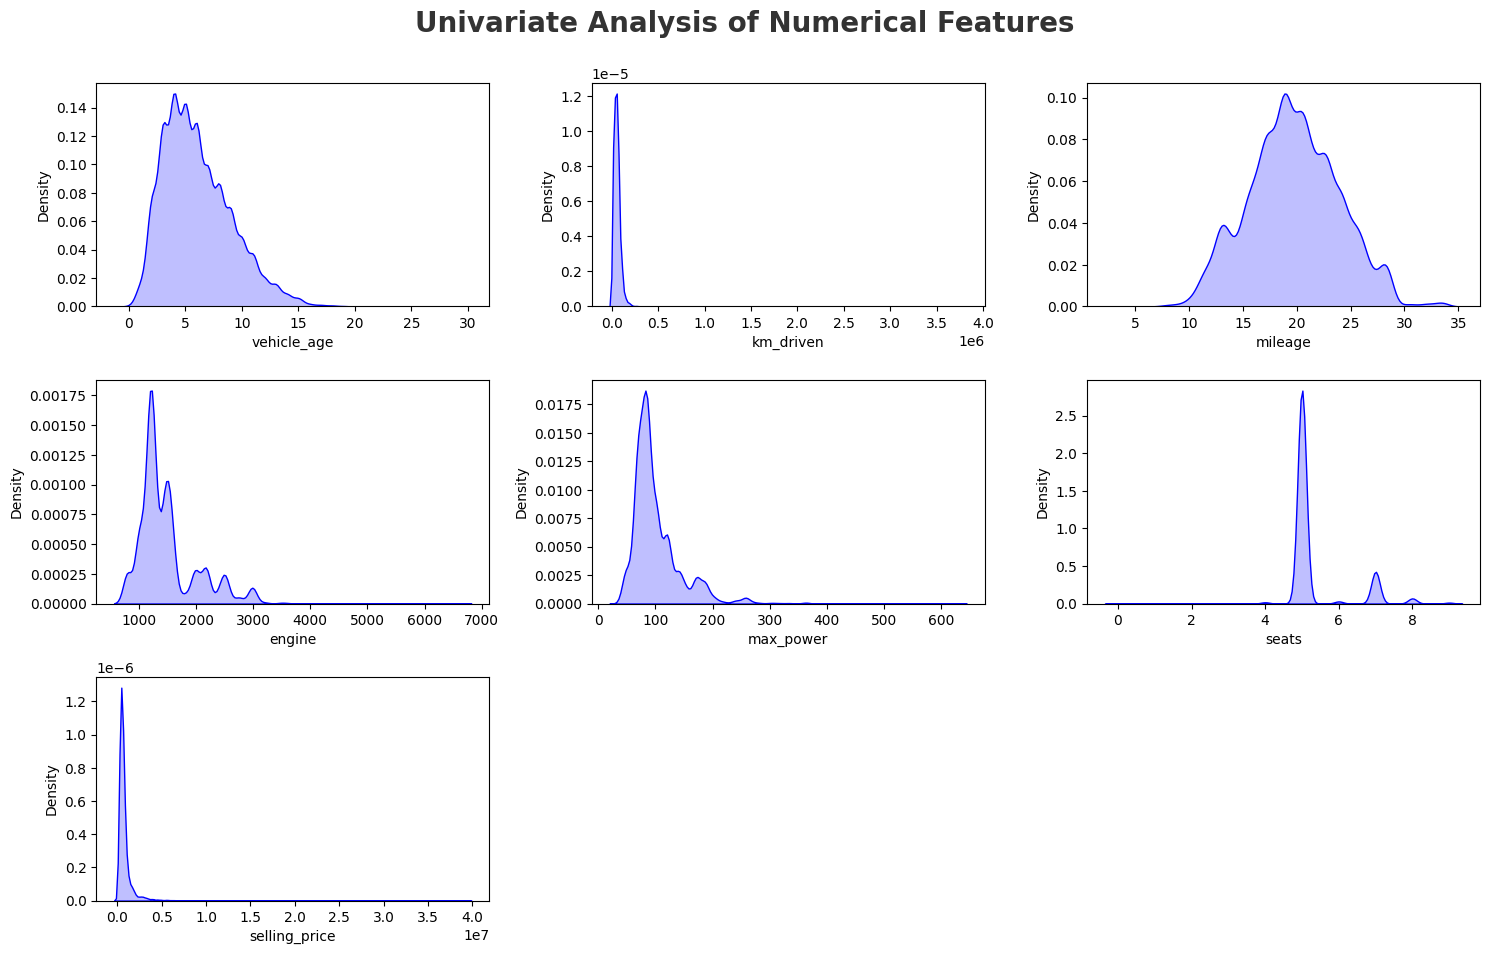

In [15]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Report**
* Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
* Outliers in km_driven, enginer, selling_price, and max power.

### Categorical Features

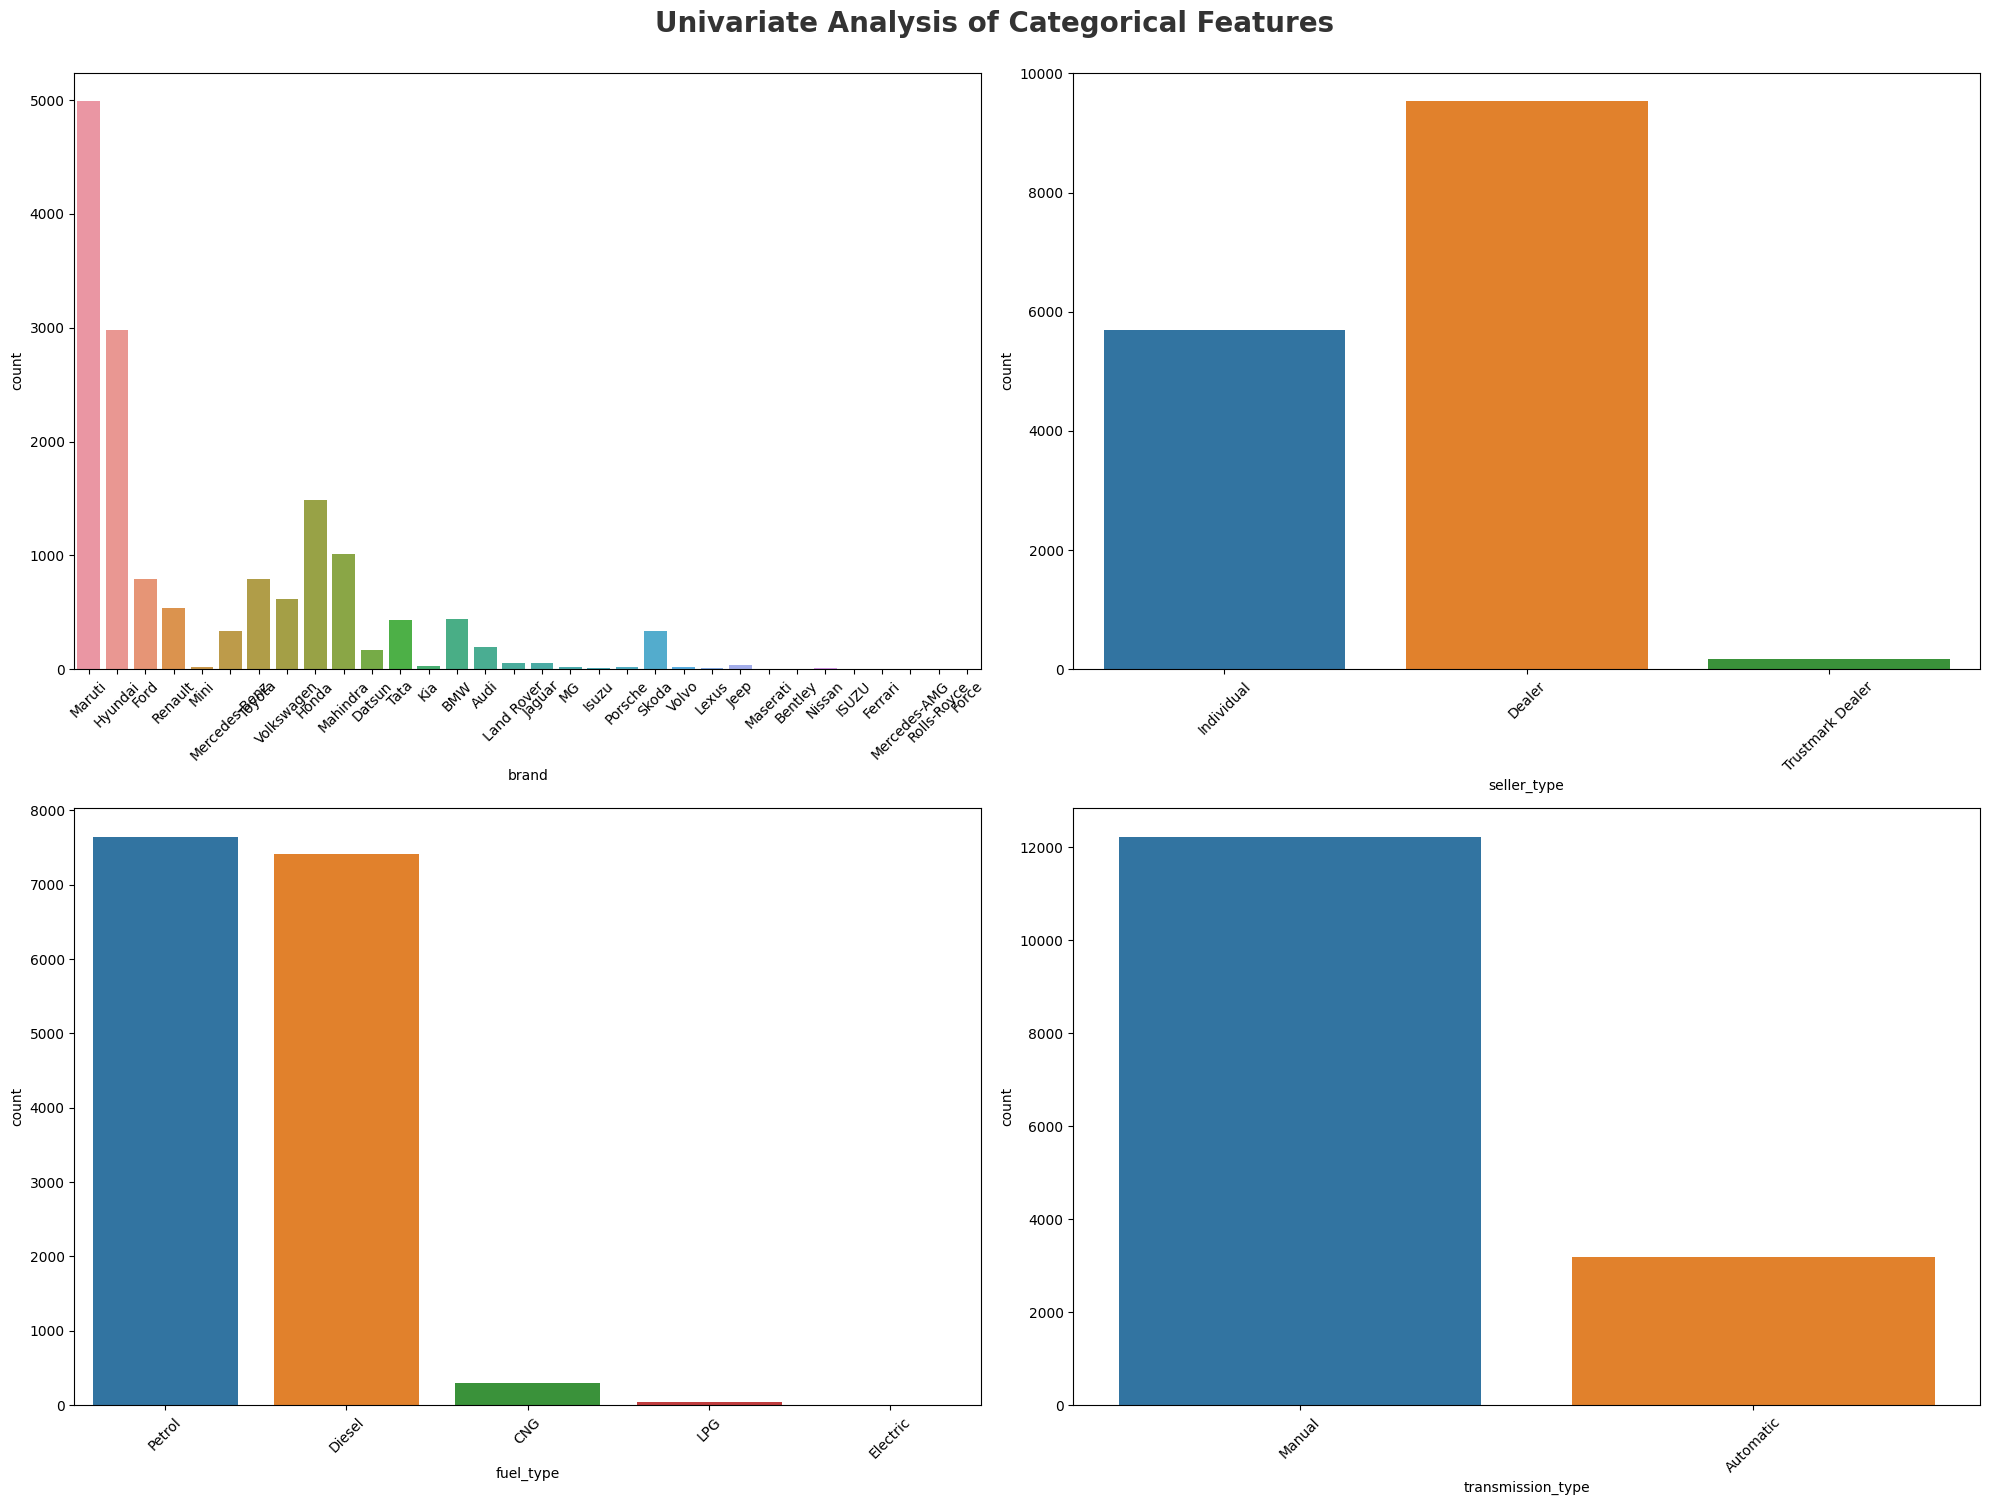

In [16]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

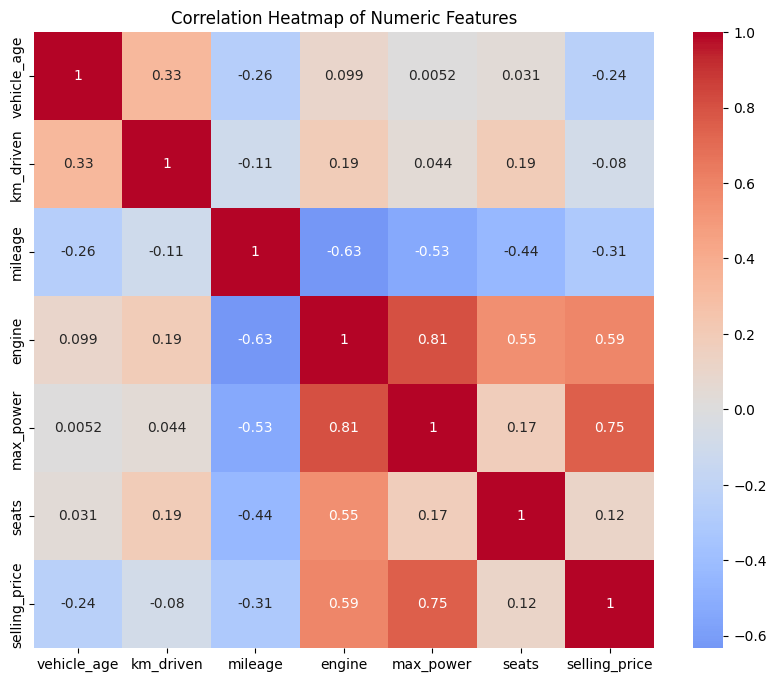

In [17]:
# Select numeric features
numeric_df = df[numeric_features]

# Compute the correlation matrix for numeric features
correlation_matrix = numeric_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e Selling Price**

In [18]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['selling_price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

Column       Hypothesis Result
0           car_name  Reject Null Hypothesis
1              brand  Reject Null Hypothesis
2              model  Reject Null Hypothesis
3        seller_type  Reject Null Hypothesis
4          fuel_type  Reject Null Hypothesis
5  transmission_type  Reject Null Hypothesis

In [19]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


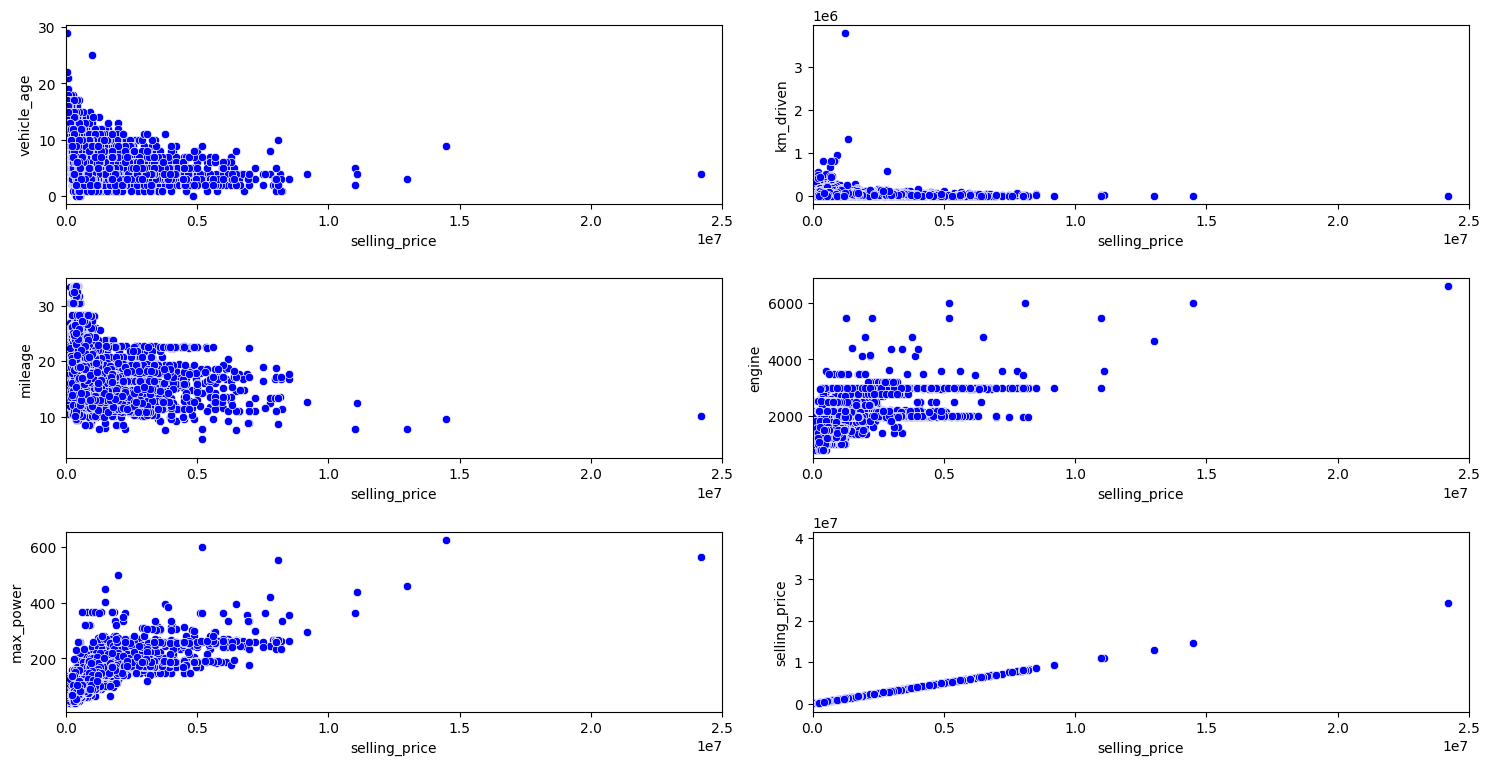

In [20]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continues_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

## Initial Analysis Report

**Report**
* **Lower Vehicle age has more selling price than Vehicle with more age.**
* **Engine CC has positive effect on price,Vehicle with 2000 cc and below are mostly priced below 5lakh.**
* **Kms Driven has negative effect on selling price.**

## 4. Visualization

### 4.1 Visualize the Target Feature

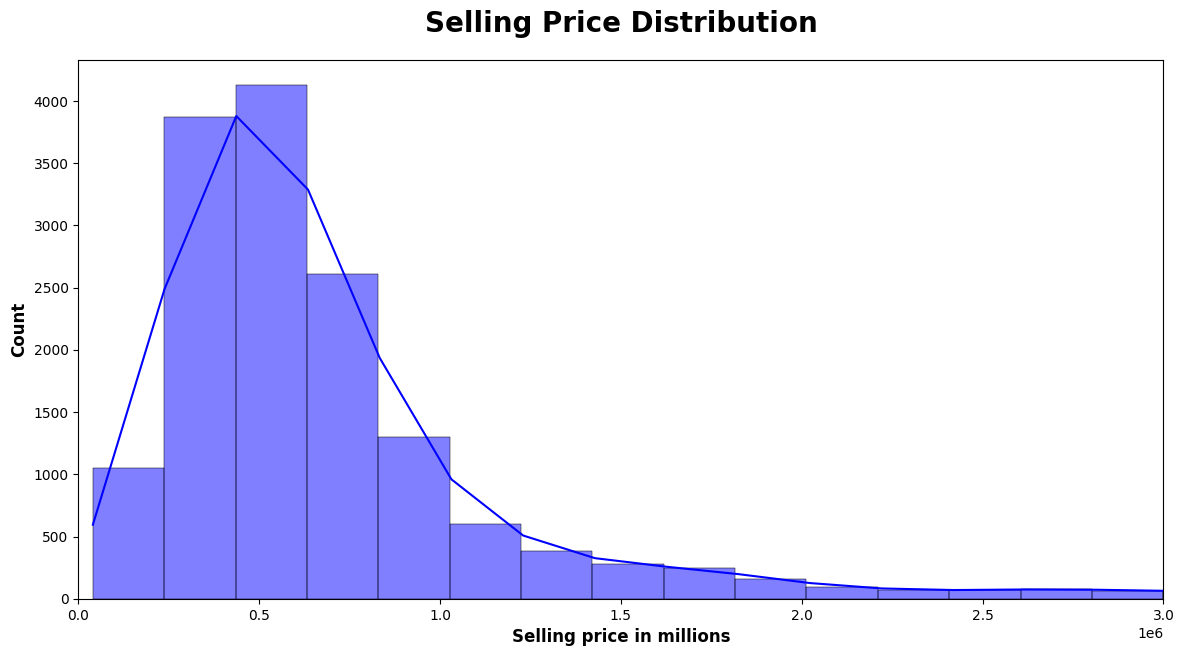

In [21]:
plt.subplots(figsize=(14,7))
sns.histplot(df.selling_price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

* From the chart it is clear that the Target Variable Skewed

### 4.2 Most Selling car in Used car website?

In [22]:
df.car_name.value_counts()[0:10]

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

### Most Selling Used Car is Hyundai i20

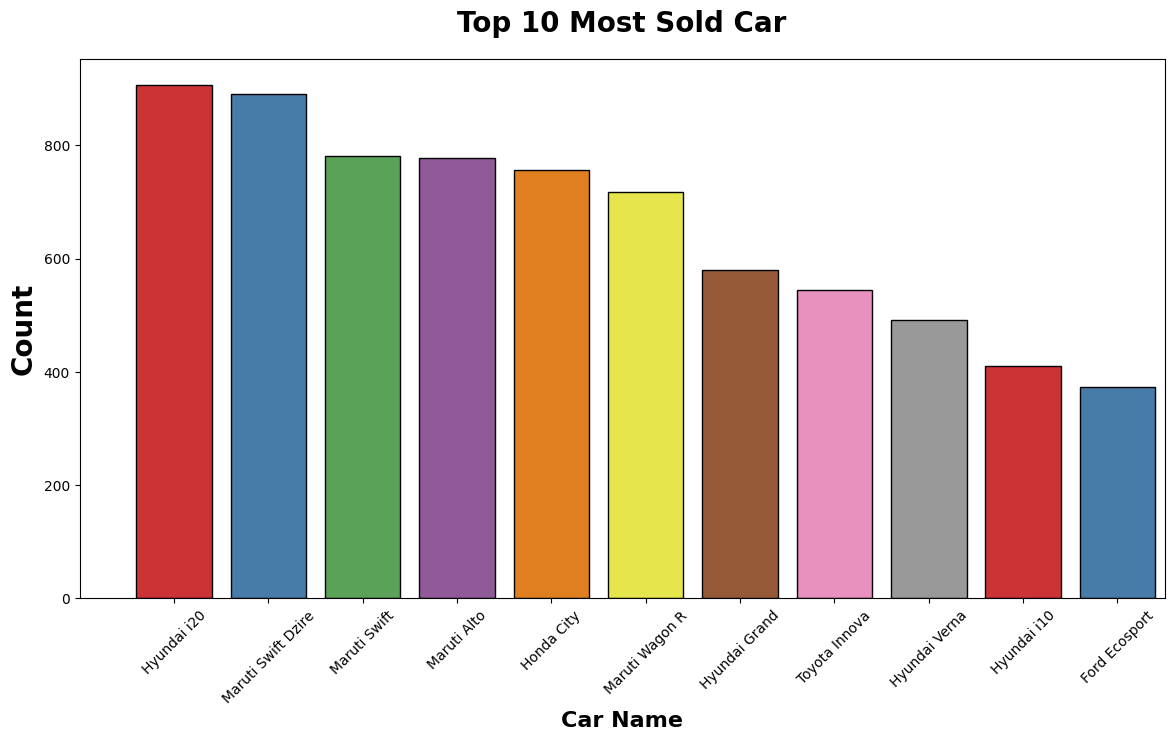

In [23]:
plt.subplots(figsize=(14,7))
sns.countplot(x="car_name", data=df,ec = "black",palette="Set1",order = df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

### Check mean price of Hyundai i20 which is most sold

In [24]:
i20 = df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()
print(f'The mean price of Hyundai i20 is {i20:.2f} Rupees')

The mean price of Hyundai i20 is 543603.75 Rupees


**Report:**
* As per the Chart these are top 10 most selling cars in used car website.
* Of the total cars sold Hyundai i20 shares 5.8% of total ads posted and followed by Maruti Swift Dzire.
* Mean Price of Most Sold Car is 5.4 lakhs.
* This Feature has impact on the Target Variable.

## Most selling brand 

In [25]:
df.brand.value_counts()[0:10]

brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

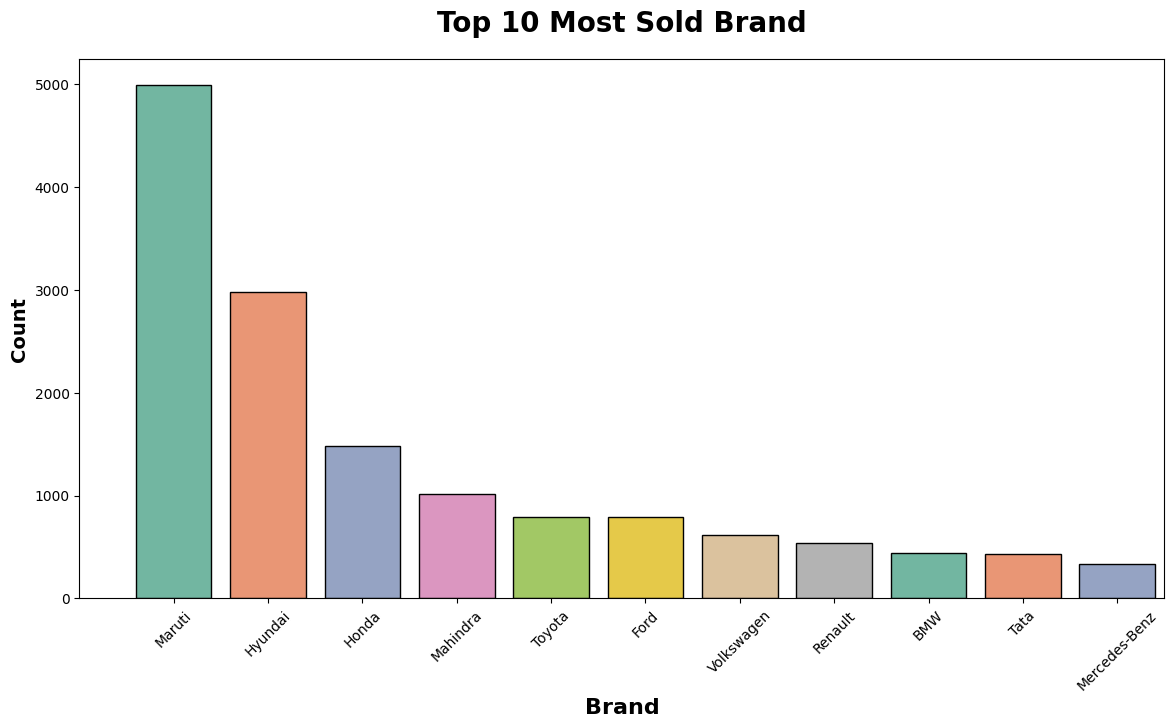

In [26]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=df,ec = "black",palette="Set2",order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

### Check the Mean price of Maruti brand which is most sold

In [27]:
maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {maruti:.2f} Rupees')

The mean price of Maruti is 487089.32 Rupees


**Report:**
* As per the Chart Maruti has the most share of Ads in Used car website and Maruti is the most sold brand.
* Following Maruti we have Hyundai and Honda.
* Mean Price of Maruti Brand is 4.8 lakhs.

## Costliest Brand and Costliest Car 

In [28]:
brand = df.groupby('brand').selling_price.max()
brand_df = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]
brand_df

selling_price
brand                       
Ferrari             39500000
Rolls-Royce         24200000
Bentley             14500000
Mercedes-Benz       13000000
Porsche             11100000
Land Rover           9200000
BMW                  8500000
Volvo                8195000
Lexus                8000000
Audi                 6800000

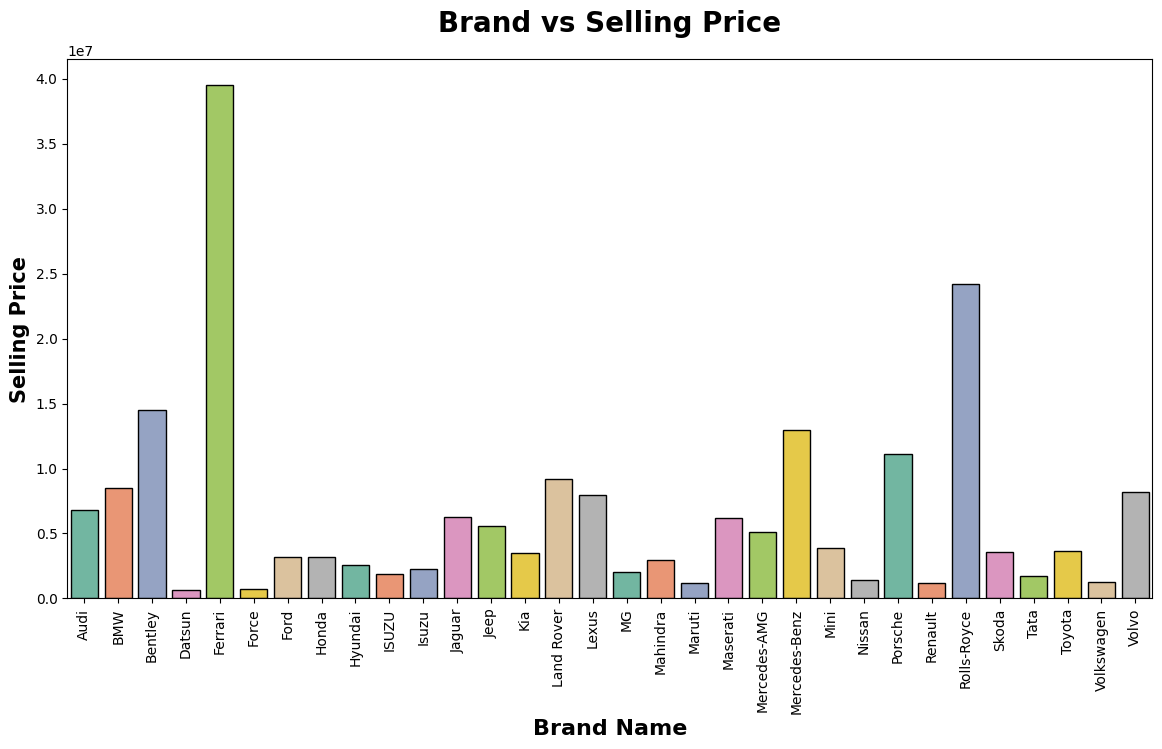

In [29]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.values,ec = "black",palette="Set2")
plt.title("Brand vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

**Report:**
* Costliest Brand sold is Ferrari at 3.95 Crores.
* Second most costliest car Brand is Rolls-Royce as 2.42 Crores.
* Brand name has very clear impact on selling price.

### Costliest Car

In [30]:
car= df.groupby('car_name').selling_price.max()
car =car.to_frame().sort_values('selling_price',ascending=False)[0:10]
car

selling_price
car_name                            
Ferrari GTC4Lusso           39500000
Rolls-Royce Ghost           24200000
Bentley Continental         14500000
Mercedes-Benz S-Class       13000000
Porsche Cayenne             11100000
Land Rover Rover             9200000
BMW 7                        8500000
BMW Z4                       8250000
Volvo XC                     8195000
BMW X5                       8100000

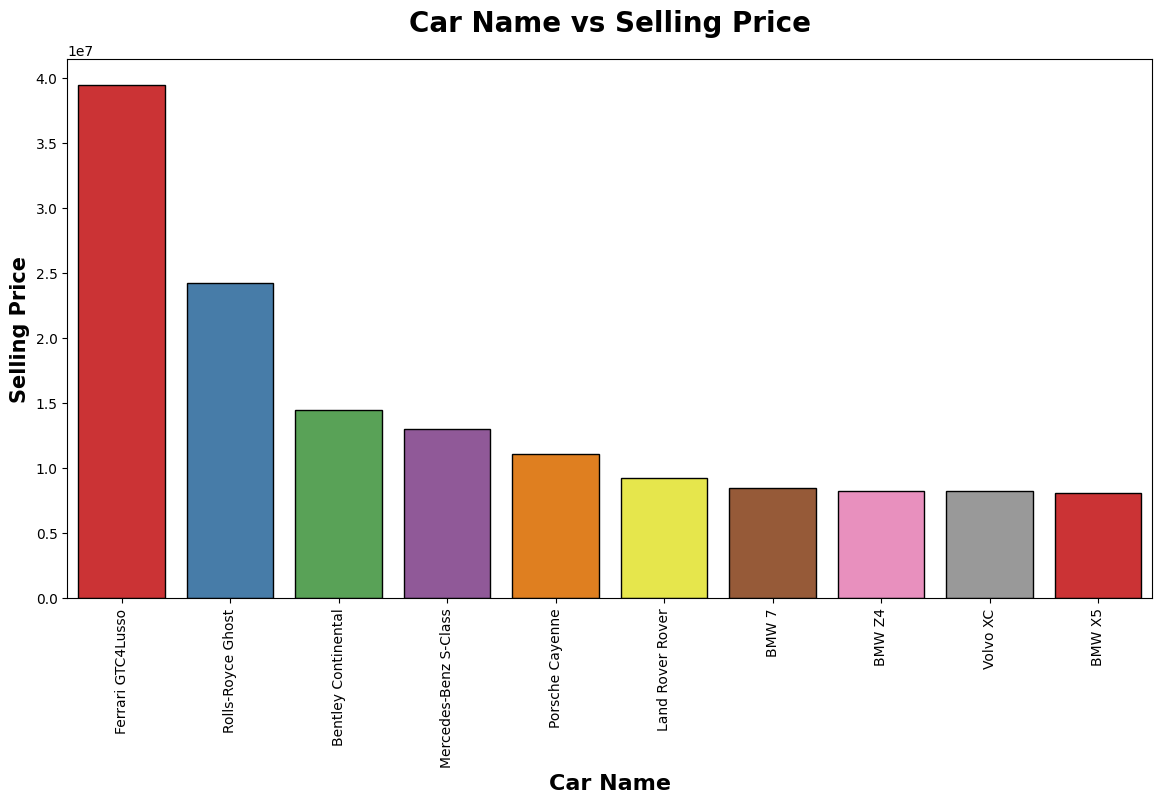

In [31]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car.selling_price,ec = "black",palette="Set1")
plt.title("Car Name vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

**Report**
* Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.
* Ferrari selling price is 3.95 Crs.
* Other than Ferrari other car has priced below 1.5cr.

### Most Mileage Brand and Car Name

In [32]:
mileage= df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)
mileage.to_frame()

mileage
brand                
Maruti      22.430980
Renault     22.099142
Datsun      21.215647
Lexus       20.846000
Ford        19.922620
Honda       19.908795
Maserati    19.820000
Tata        19.755279
Hyundai     19.588776
Volkswagen  18.689774
Mini        18.287647
Skoda       17.667006
BMW         17.440182
Kia         17.323125
Force       17.000000

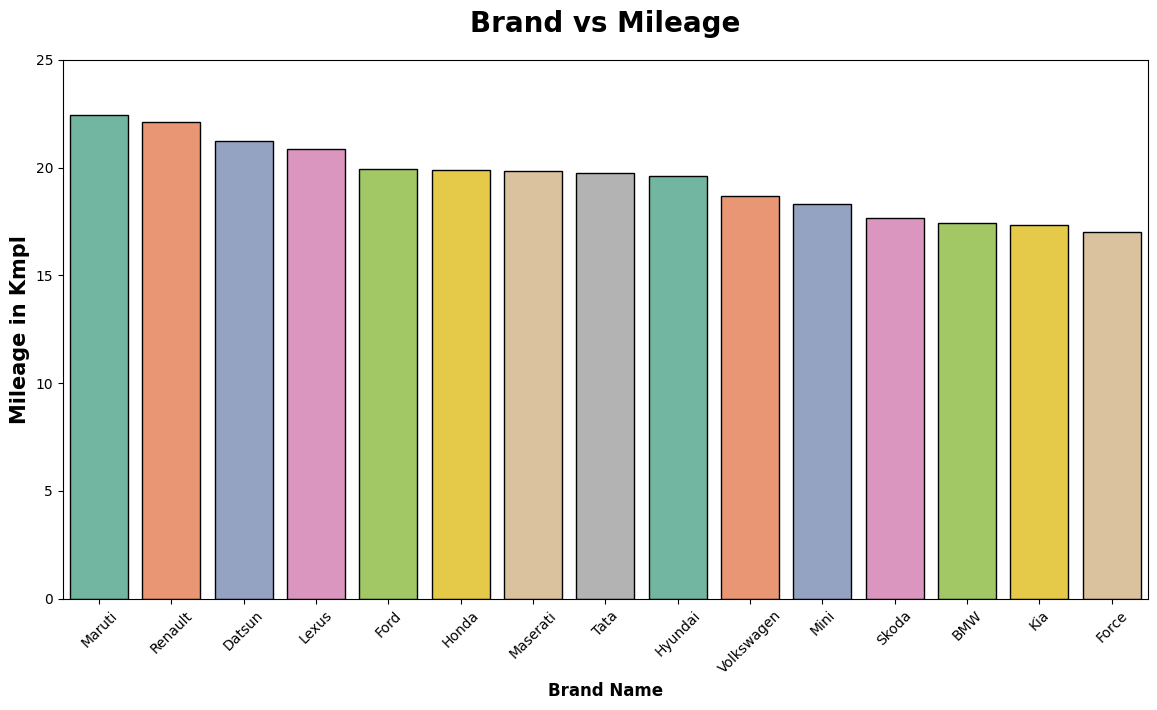

In [33]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec = "black", palette="Set2")
plt.title("Brand vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=12)
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()

### Car with Highest Mileage

In [34]:
mileage_C= df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)
mileage_C.to_frame()

mileage
car_name                   
Tata Tiago        24.625103
Maruti Ciaz       24.289046
Maruti Vitara     24.231932
Renault KWID      24.037810
Maruti Celerio    23.703502
Maruti Dzire VXI  23.512941
Maruti Dzire LXI  23.260000
Maruti Dzire ZXI  23.260000
Ford Aspire       22.993846
Maruti Swift      22.719910

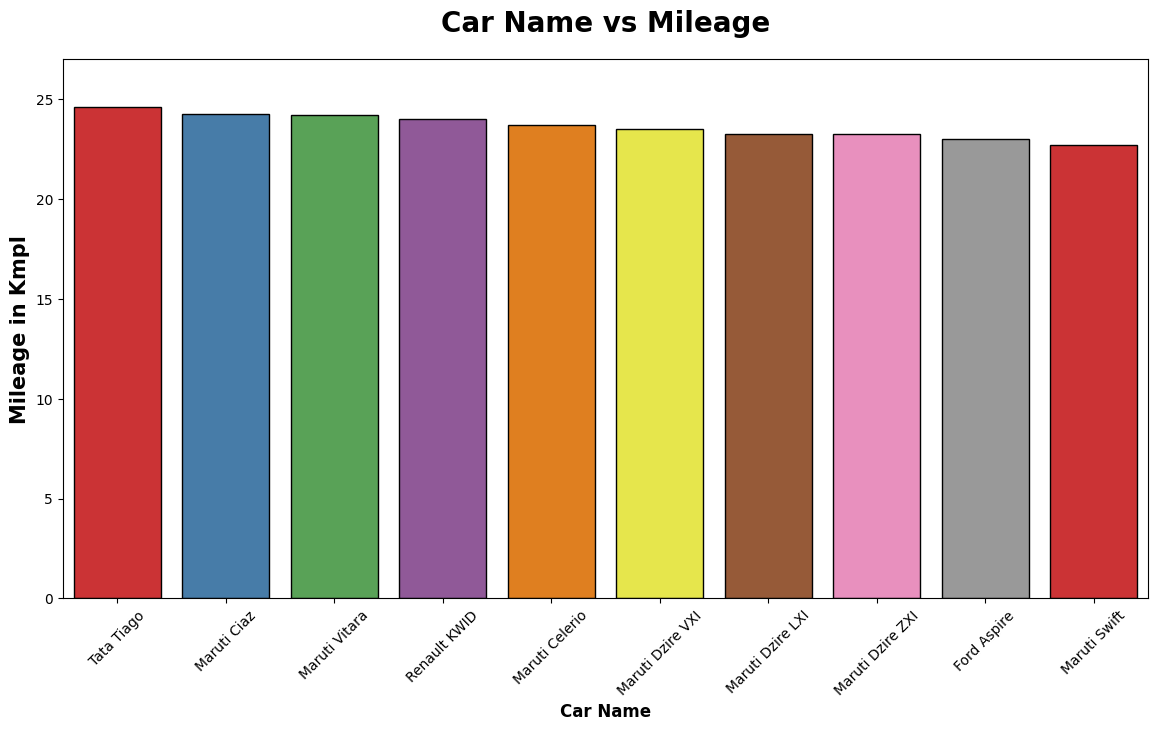

In [35]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage_C.index, y=mileage_C.values, ec = "black", palette="Set1")
plt.title("Car Name vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=12)
plt.ylim(0,27)
plt.xticks(rotation=45)
plt.show()

## Kilometer driven vs Selling Price

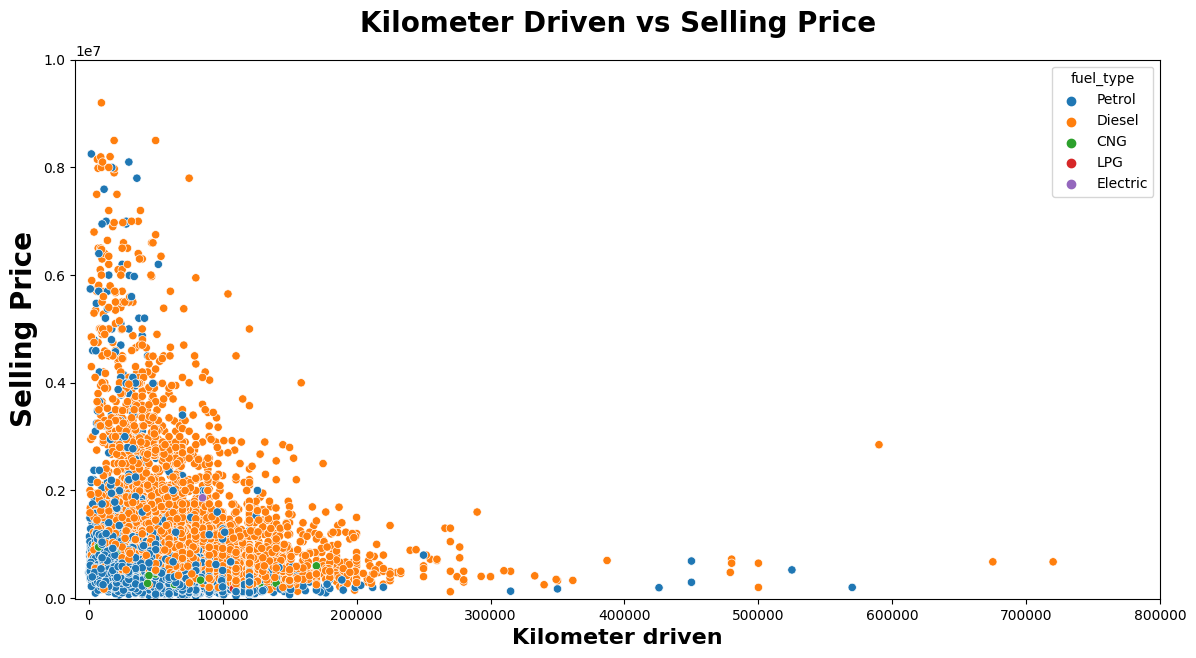

In [36]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

**Report**
* Many Cars were sold with kms between 0 to 20k Kilometers 
* Low Kms driven cars had more selling price compared to cars which had more kms driven.

### Fuel Type Selling Price

In [37]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

selling_price
fuel_type               
Electric       1857500.0
Diesel          700000.0
Petrol          460000.0
CNG             370000.0
LPG             182500.0

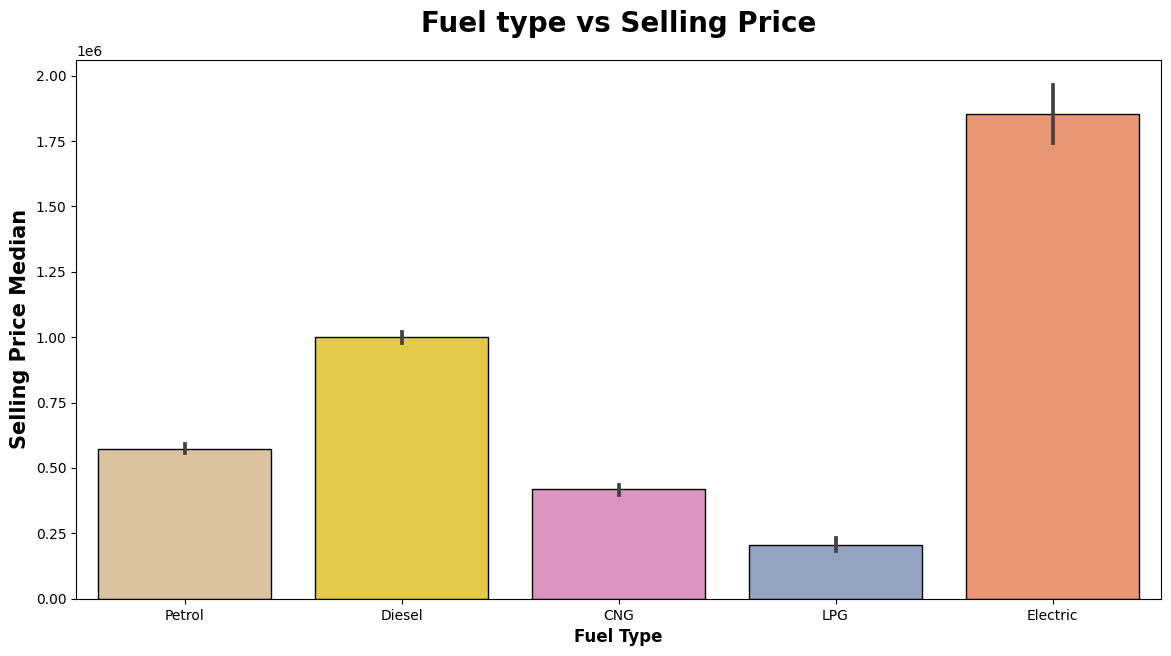

In [38]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df.fuel_type, y=df.selling_price, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price Median", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

**Report**
* Electric cars have highers selling average price.
* Followed by Diesel and Petrol.
* Fuel Type is also important feature for the Target variable.

### Most sold Fuel type

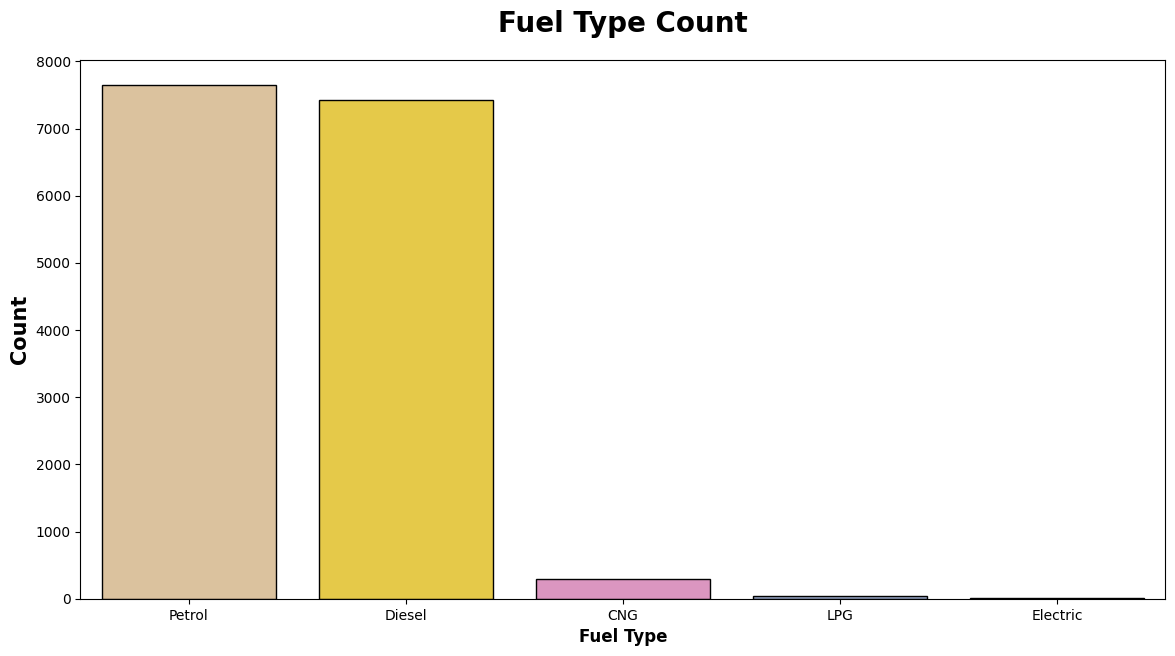

In [39]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.fuel_type, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

**Report** 
* Petrol and Diesel dominate the used car market in the website.
* The most sold fuel type Vechicle is Petrol.
* Followed by diesel and CNG and least sold is Electric

### Fuel types available and mileage given

In [44]:
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

mileage
fuel_type           
CNG        25.814651
Diesel     20.060030
Electric   19.160000
Petrol     19.123045
LPG        17.836364

In [45]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type', y='mileage', data=df,palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

### Mileage vs Selling Price

In [46]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="mileage", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

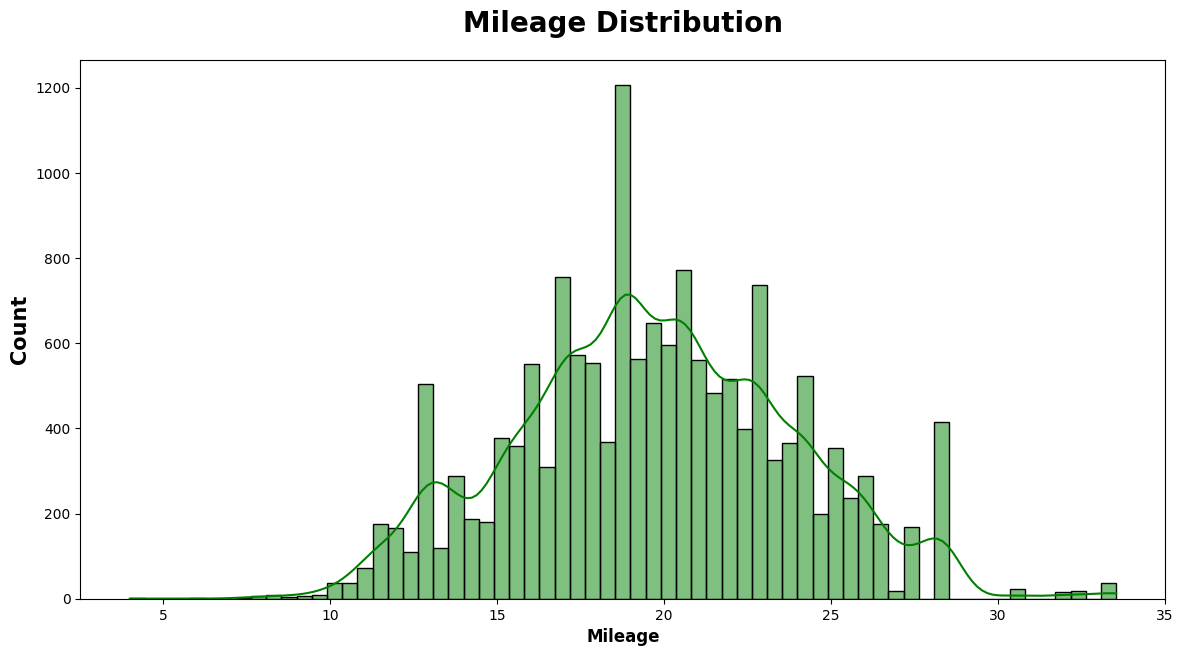

In [47]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.mileage, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

### Vehicle age vs Selling Price

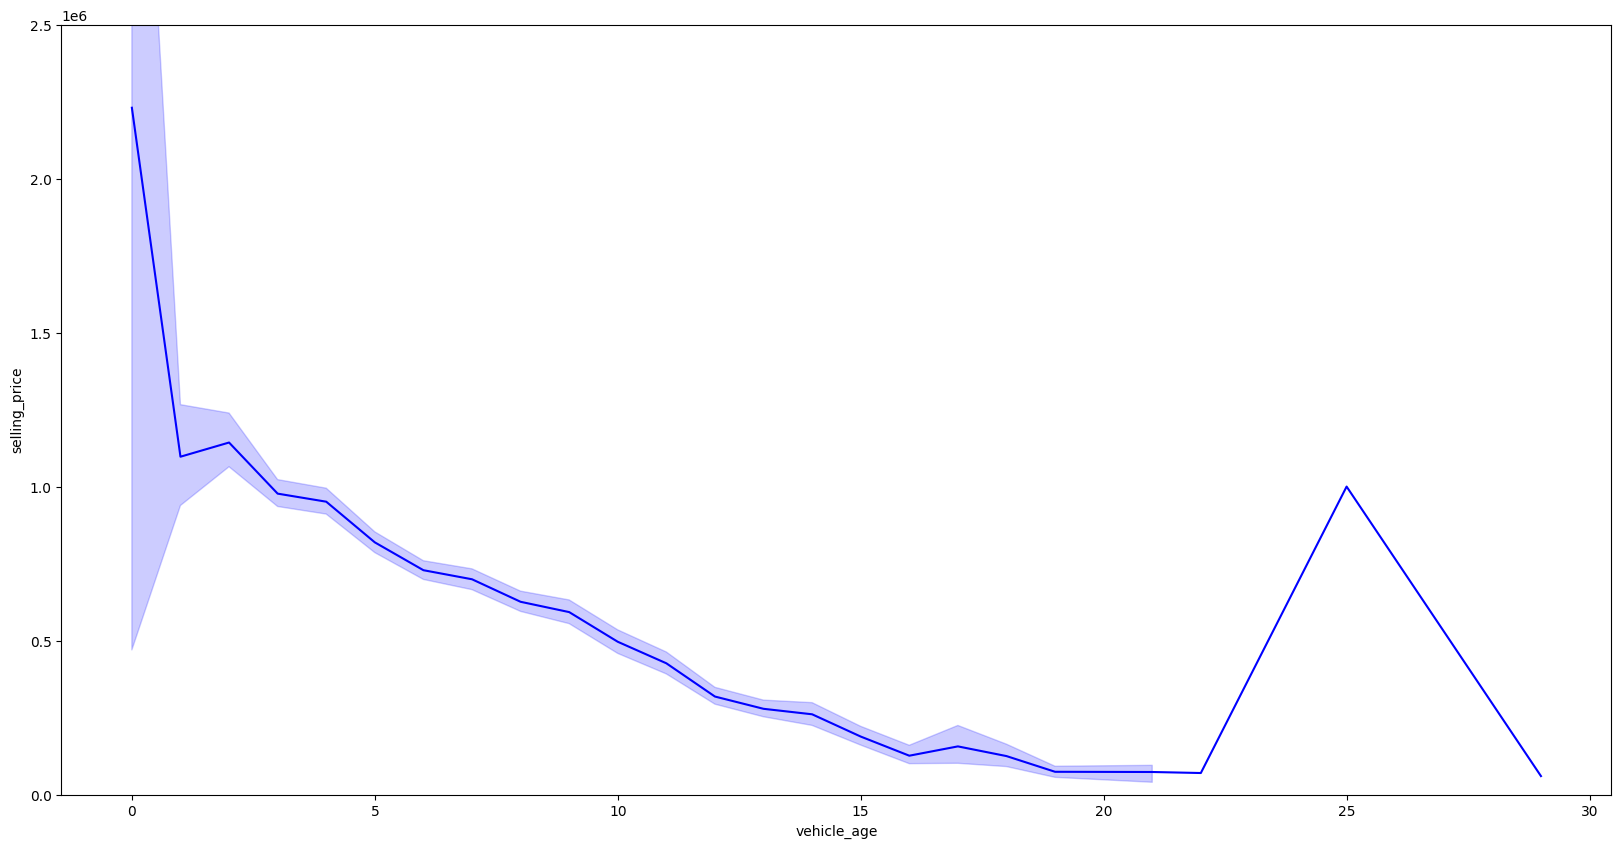

In [48]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

**Report** 
* As the Vehicle age increases the price also get reduced.
* Vehicle age has Negative impact on selling price

### Vehicle age vs Mileage

In [49]:
vehicle_age = df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head(5)

mileage
vehicle_age         
29             22.05
0              21.70
3              21.21
4              20.63
5              20.51

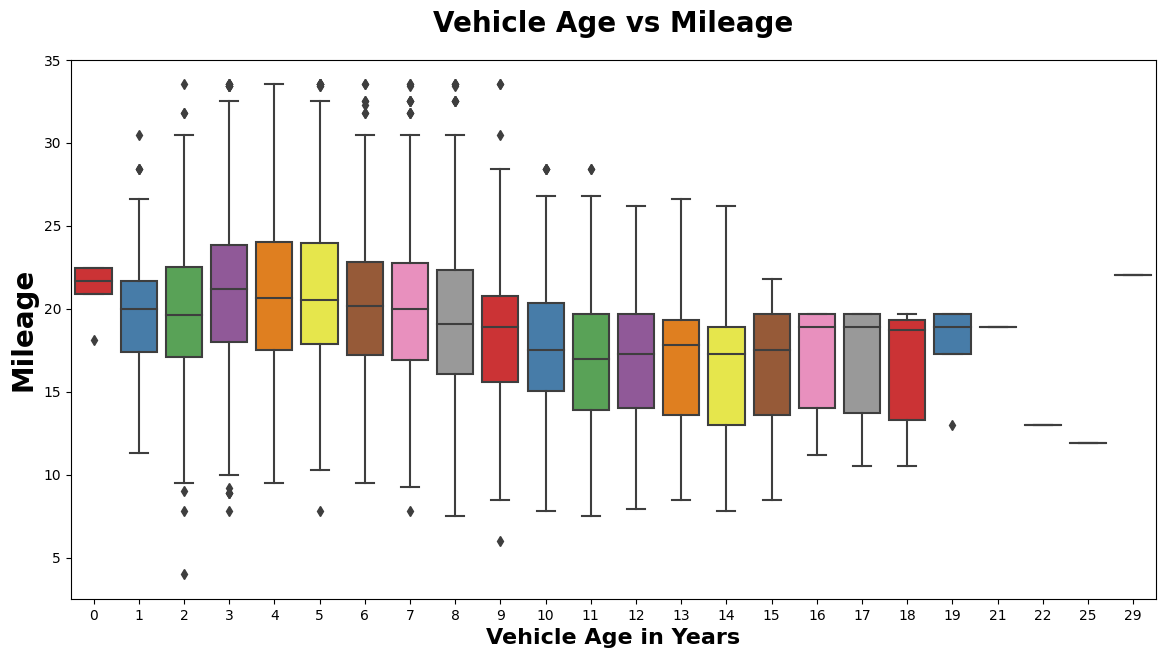

In [50]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df.vehicle_age, y= df.mileage, palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

**Report** 
* As the Age of vehicle increases the median of mileage drops.
* Newer Vehicles have more mileage median older vehicle.

In [51]:
oldest = df.groupby('car_name')['vehicle_age'].max().sort_values(ascending=False).head(10)
oldest.to_frame()

vehicle_age
car_name                          
Maruti Alto                     29
BMW 3                           25
Honda City                      22
Maruti Wagon R                  21
Mahindra Bolero                 18
Mahindra Scorpio                18
Skoda Octavia                   18
Honda CR-V                      17
Mercedes-Benz E-Class           17
Honda Civic                     15

**Report**
* Maruti Alto is the Oldest car available 29 years old in the used car website followed by BMW 3 for 25 years old.

## Transmission Type

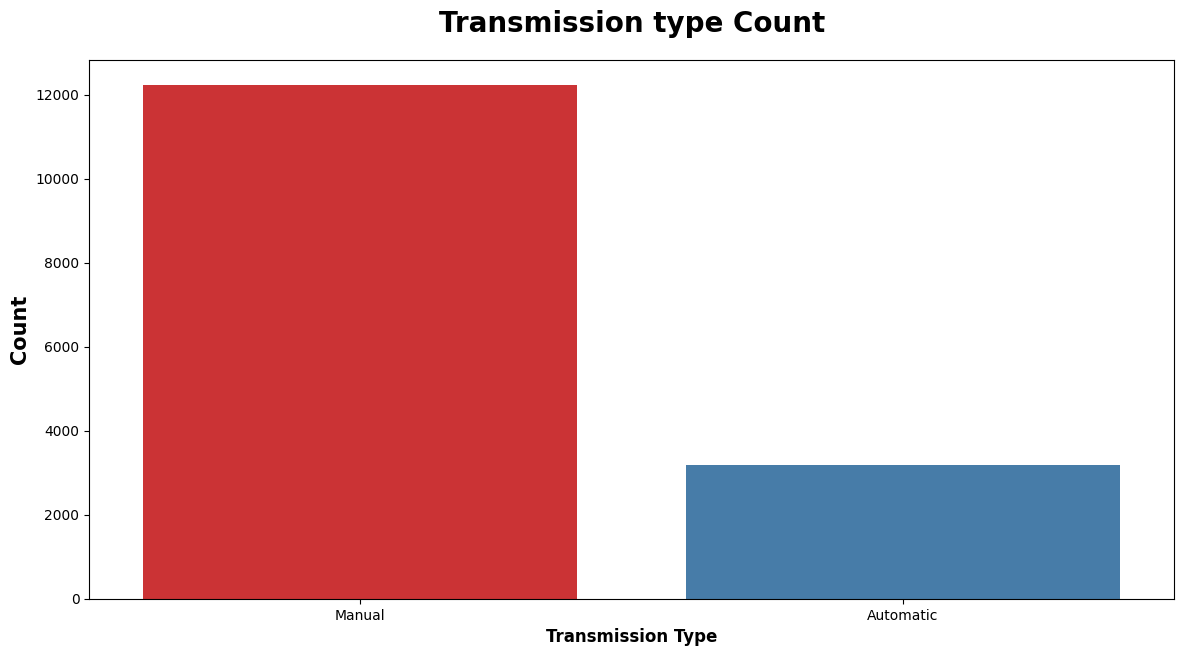

In [52]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission_type', data=df,palette="Set1")
plt.title("Transmission type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

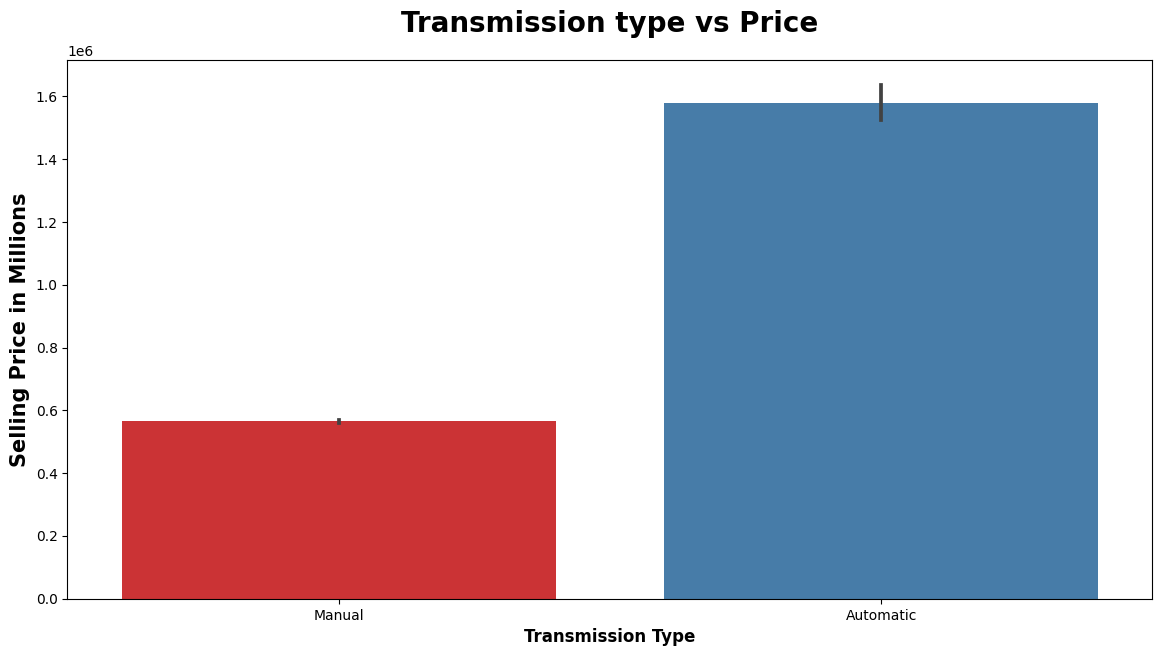

In [53]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type', y='selling_price', data=df,palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

**Report** 
* Manual Transmission was found in most of the cars which was sold.
* Automatic cars have more selling price than manual cars.

## Seller Type

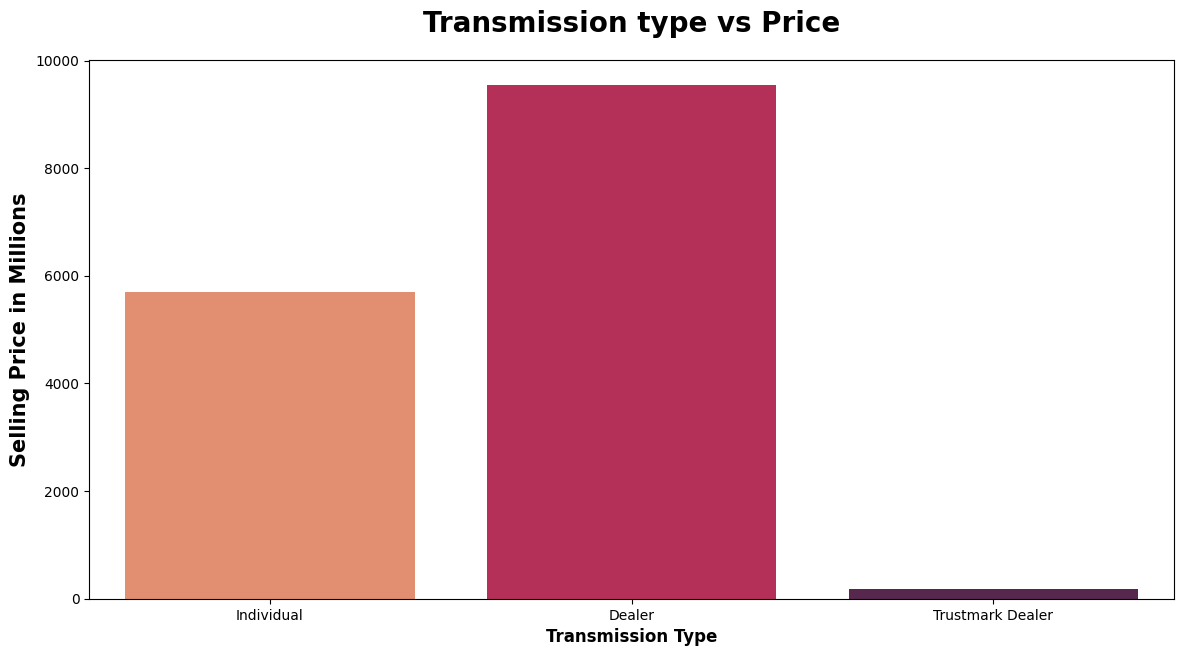

In [54]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type', data=df,palette="rocket_r")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

In [55]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

selling_price
seller_type                    
Dealer                 591000.0
Trustmark Dealer       540000.0
Individual             507000.0

**Report**
* Dealers have put more ads on used car website.
* Dealers have put 9539 ads with median selling price of 5.91 Lakhs.
* Followed by Individual with 5699 ads with median selling price of 5.4 Lakhs.
* Dealers have more median selling price than Individual.

#### Checking for Outliers

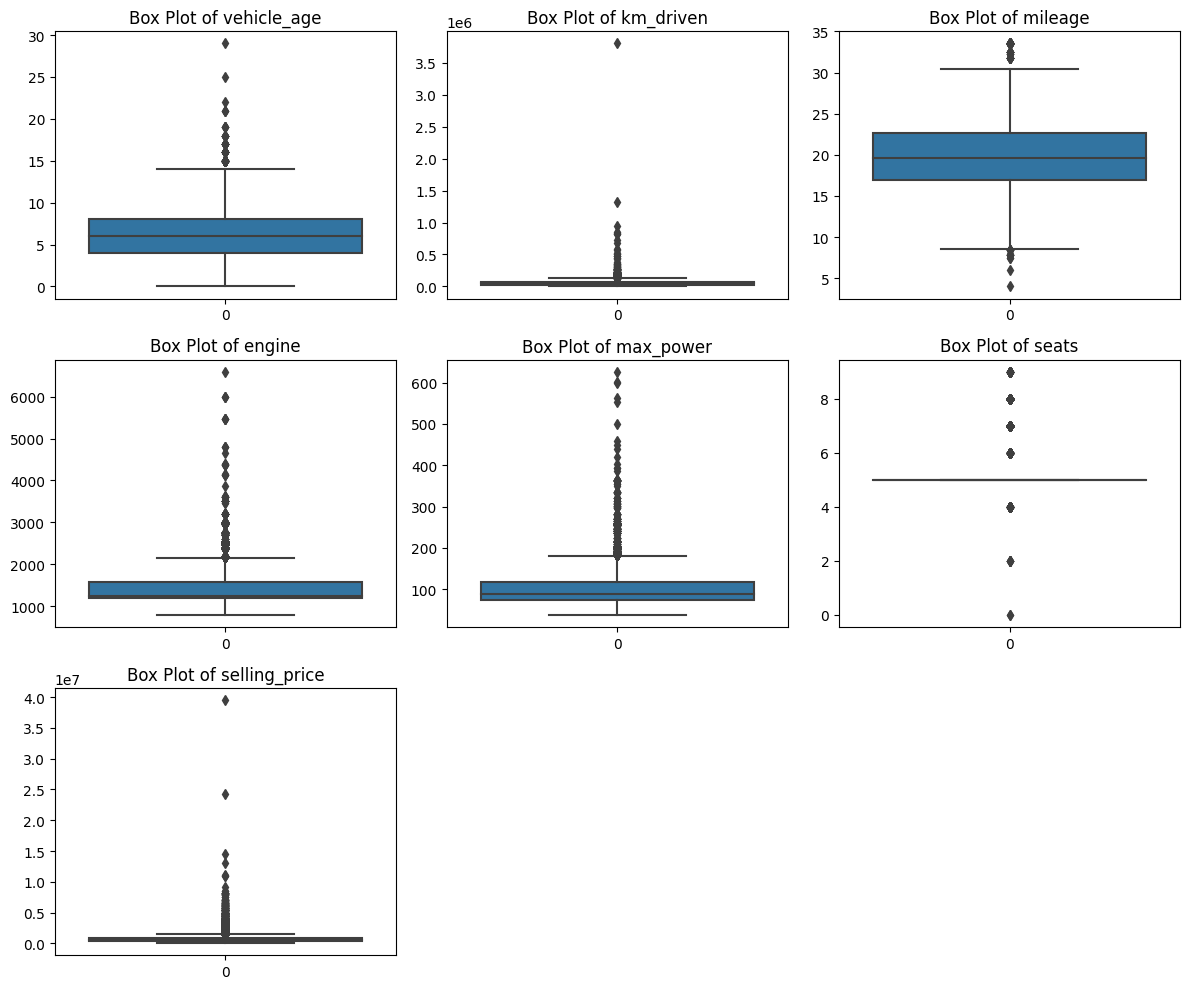

In [56]:
# List of features with potential outliers
features_with_outliers = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

# Create box plots for each feature
plt.figure(figsize=(12, 10))
for feature in features_with_outliers:
    plt.subplot(3, 3, features_with_outliers.index(feature) + 1)
    sns.boxplot(data=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()



## Final Report

* The datatypes and Column names were right and there was 15411 rows and 13 columns
* The `selling_price` column is the target to predict. i.e Regression Problem.
* There are outliers in the `km_driven`, `enginer`, `selling_price`, and `max power`.
* Dealers are the highest sellers of the used cars.
* Skewness is found in few of the columns will check it after handling outliers.
* Vehicle age has negative impact on the price.
* Manual cars are mostly sold and automatic has higher selling average than manual cars.
* Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
* We just need less data cleaning for this dataset.

# 5. Data Pre-Processing 

In [57]:
df.head()

car_name    brand     model  vehicle_age  km_driven seller_type  \
0    Maruti Alto   Maruti      Alto            9     120000  Individual   
1  Hyundai Grand  Hyundai     Grand            5      20000  Individual   
2    Hyundai i20  Hyundai       i20           11      60000  Individual   
3    Maruti Alto   Maruti      Alto            9      37000  Individual   
4  Ford Ecosport     Ford  Ecosport            6      30000      Dealer   

  fuel_type transmission_type  mileage  engine  max_power  seats  \
0    Petrol            Manual    19.70     796      46.30      5   
1    Petrol            Manual    18.90    1197      82.00      5   
2    Petrol            Manual    17.00    1197      80.00      5   
3    Petrol            Manual    20.92     998      67.10      5   
4    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000

In [58]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

### Feature Enocoding 

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Train label encoders for categorical features
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

# Train scaler for numeric features
# Drop 'selling_price' from numeric_features
numeric_features.remove('selling_price')
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Save label encoders and scaler using pickle
with open("label_encoders.pkl", "wb") as le_file:
    pickle.dump(label_encoders, le_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)


In [6]:
df.head()

car_name  brand  model  vehicle_age  km_driven  seller_type  fuel_type  \
0        65     18      7     0.983562   1.247335            1          4   
1        34      8     54    -0.343933  -0.690016            1          4   
2        40      8    118     1.647309   0.084924            1          4   
3        65     18      7     0.983562  -0.360667            1          4   
4        20      6     38    -0.012060  -0.496281            0          1   

   transmission_type   mileage    engine  max_power     seats  selling_price  
0                  1 -0.000276 -1.324259  -1.263352 -0.403022         120000  
1                  1 -0.192071 -0.554718  -0.432571 -0.403022         550000  
2                  1 -0.647583 -0.554718  -0.479113 -0.403022         215000  
3                  1  0.292211 -0.936610  -0.779312 -0.403022         226000  
4                  1  0.735736  0.022918  -0.046502 -0.403022         570000

In [10]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

save preprocessed data 

In [7]:
# Save the preprocessed data to a CSV file
df.to_csv('preprocessed_data.csv', index=False)

print("Preprocessed data saved to 'preprocessed_data.csv'")


Preprocessed data saved to 'preprocessed_data.csv'


In [8]:
X = df.drop(['selling_price'], axis = 1)
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# 6. Model Traning 

In [9]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [64]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.6178
- Mean Absolute Error: 0.2869
- R2 Score: 0.6200
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5496
- Mean Absolute Error: 0.3024
- R2 Score: 0.6926


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.9958
- Mean Absolute Error: 0.4941
- R2 Score: 0.0126
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9862
- Mean Absolute Error: 0.5260
- R2 Score: 0.0099


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.6178
- Mean Absolute Error: 0.2868
- R2 Score: 0.6200
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5495
- Mean Absolute Error: 0.3024
- R2 Score: 0.6926


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.4320
- Mean Absolute Error: 0.0964
- R2 Score: 0.8142
-----------------------

Random Forest since to be good model for this project, therfore we will be moving forward with Random forest regressor

#### Performing Hyper-parameter tuning on random forest regressor model 

In [66]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the Random Forest Regressor and hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using the best model
rf_regressor = RandomForestRegressor(n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_depth=None)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Evaluate Train and Test dataset
train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
print("- Mean Absolute Error: {:.4f}".format(train_mae))
print("- R2 Score: {:.4f}".format(train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
print("- Mean Absolute Error: {:.4f}".format(test_mae))
print("- R2 Score: {:.4f}".format(test_r2))


Model performance for Training set
- Root Mean Squared Error: 214483.8805
- Mean Absolute Error: 58951.7744
- R2 Score: 0.9435
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 245555.4787
- Mean Absolute Error: 93634.1411
- R2 Score: 0.9188


In [73]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("regressor.pkl","wb")
pickle.dump(rf_regressor, pickle_out)
pickle_out.close()